##  Task 2 — Quantitative Analysis with One Dataset

In [ ]:
# Step 0: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib as ta  # Make sure TA-Lib is installed

sns.set(style="whitegrid")

In [4]:
# Path to your AAPL CSV file
file_path = r"C:\Users\Dell\Pictures\Predicting-Price-Moves-with-News-Sentiment-week1\Predicting-Price-Moves-with-News-Sentiment-week1\data\AAPL.csv"

df = pd.read_csv(file_path, parse_dates=['Date'])

# Preview
df.head()


,Date,Close,High,Low,Open,Volume
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800


### Step 2 — Calculate Technical Indicators (TA-Lib)

In [5]:
# Simple Moving Averages
df['SMA_20'] = ta.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = ta.SMA(df['Close'], timeperiod=50)

# Relative Strength Index
df['RSI_14'] = ta.RSI(df['Close'], timeperiod=14)

# MACD
df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.MACD(df['Close'])


### Step 3 — Financial Metrics

In [6]:
# Daily simple return
df['daily_return'] = df['Close'].pct_change()

# Logarithmic return
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))

# Cumulative return
df['cum_return'] = (1 + df['daily_return']).cumprod()


### Step 4 — Visualize Data

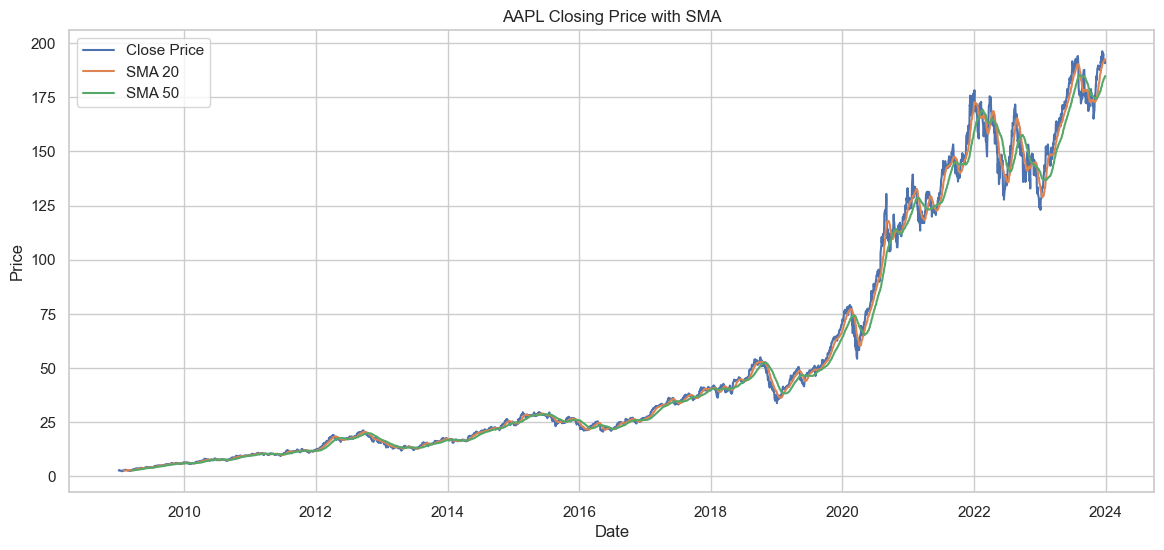

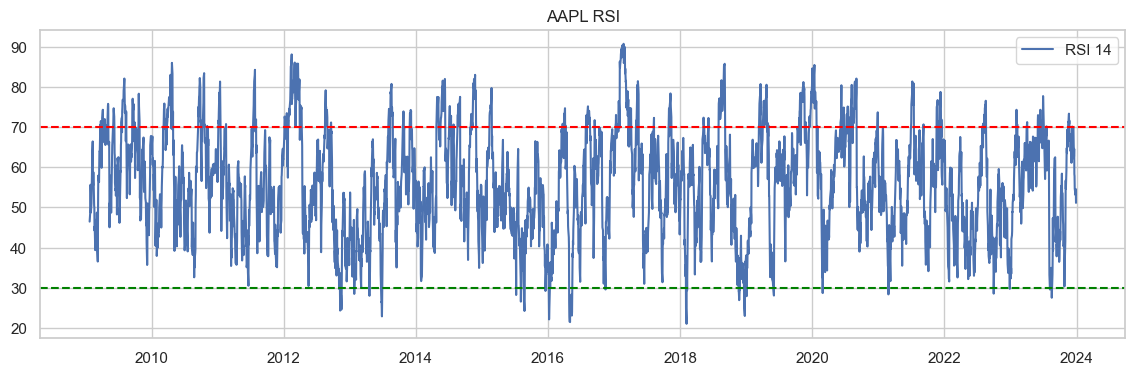

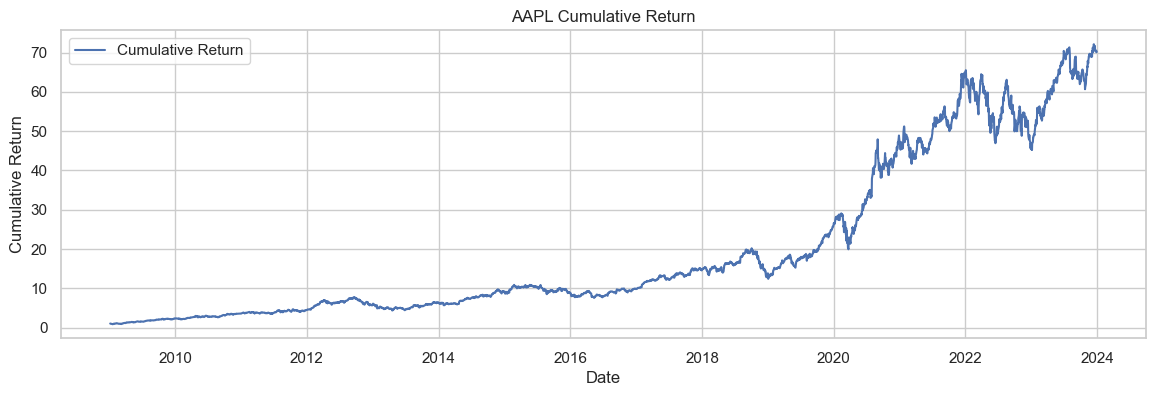

In [7]:
# Closing Price with SMA
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['SMA_20'], label='SMA 20')
plt.plot(df['Date'], df['SMA_50'], label='SMA 50')
plt.title("AAPL Closing Price with SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# RSI
plt.figure(figsize=(14,4))
plt.plot(df['Date'], df['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("AAPL RSI")
plt.legend()
plt.show()

# Cumulative return
plt.figure(figsize=(14,4))
plt.plot(df['Date'], df['cum_return'], label='Cumulative Return')
plt.title("AAPL Cumulative Return")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()
